In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Airbnb NYC 2019.csv'
df = pd.read_csv(file_path)

# Quick look at the data
df.head(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [49]:
# Look at the last 5 rows
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [50]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [51]:
# Summary of numerical columns
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [35]:
# 1. Drop unnecessary columns to keep the data clean
df.drop(['id', 'host_name', 'last_review'], axis=1, inplace=True)

# 2. Check how many missing values we have in each column
print("Missing values per column:")
print(df.isnull().sum())

# If 'reviews_per_month' is NaN, it's likely because the property has 0 reviews.
df['reviews_per_month'].fillna(0, inplace=True)

# If 'name' is missing, we'll just call it 'Unknown'
df['name'].fillna('Unknown', inplace=True)

# 4. Final check: verify there are no more critical missing values
print("\nMissing values after cleaning:")
print(df.isnull().sum())

Missing values per column:
name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Missing values after cleaning:
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_h

/tmp/ipython-input-2576506808.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)
/tmp/ipython-input-2576506808.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [52]:
# 1. Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# 2. Calculate the IQR (The middle 50% of the data)
IQR = Q3 - Q1

# Anything below Lower Bridge or above Upper Bridge is an outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Any price below ${lower_bound} or above ${upper_bound} is an outlier.")

# We keep only the data that falls within the bounds
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print(f"Original dataset size: {len(df)}")
print(f"New dataset size after removing outliers: {len(df_filtered)}")

Any price below $-90.0 or above $334.0 is an outlier.
Original dataset size: 48895
New dataset size after removing outliers: 45923


/tmp/ipython-input-2301152325.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='price_category', palette='viridis', order=labels)


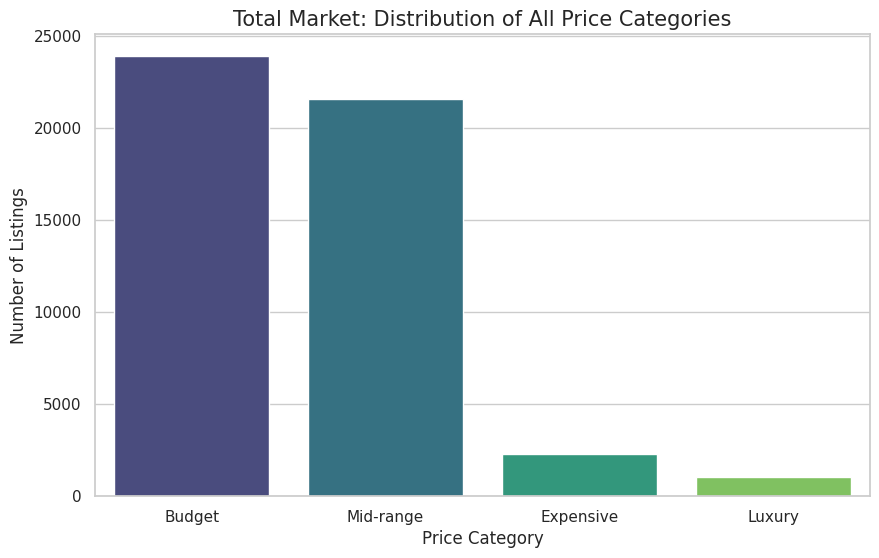

Full Market Counts (Including Outliers):
price_category
Budget       23917
Mid-range    21610
Expensive     2313
Luxury        1044
Name: count, dtype: int64


In [62]:
bins = [0, 100, 300, 500, 10000]
labels = ['Budget', 'Mid-range', 'Expensive', 'Luxury']

df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)

# 3. Visualization: Count plot of the FULL dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='price_category', palette='viridis', order=labels)

# 4. Add labels and title
plt.title('Total Market: Distribution of All Price Categories', fontsize=15)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)

# 5. Show the plot
plt.show()

# 6. Show the counts
print("Full Market Counts (Including Outliers):")
print(df['price_category'].value_counts())

/tmp/ipython-input-1770261967.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stats_df, x='neighbourhood_group', y='avg_price', palette='Reds_r', ax=ax1, alpha=0.7)


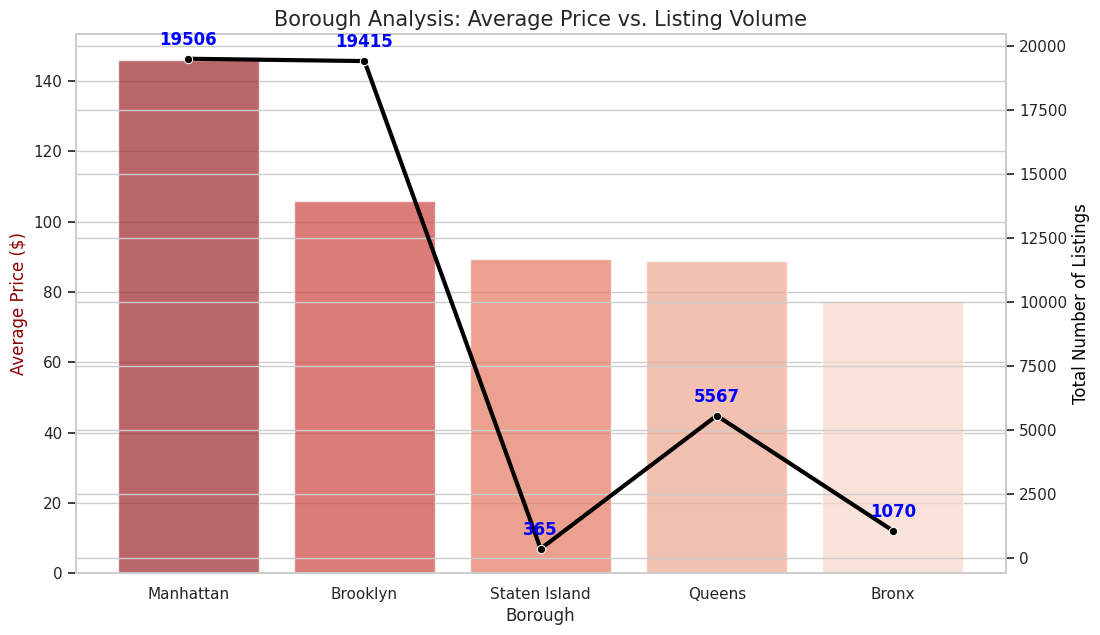

In [66]:
stats_df = df_filtered.groupby('neighbourhood_group').agg(
    avg_price=('price', 'mean'),
    listing_count=('id', 'count')
).reset_index()

# 2. Sort by average price so the bars look organized
stats_df = stats_df.sort_values(by='avg_price', ascending=False)

# 3. Initialize the figure and the first axis (for the bars)
fig, ax1 = plt.subplots(figsize=(12, 7))

# 4. Plot the Bar Chart (Average Price)
sns.barplot(data=stats_df, x='neighbourhood_group', y='avg_price', palette='Reds_r', ax=ax1, alpha=0.7)
ax1.set_ylabel('Average Price ($)', fontsize=12, color='darkred')
ax1.set_xlabel('Borough', fontsize=12)
ax1.set_title('Borough Analysis: Average Price vs. Listing Volume', fontsize=15)

# 5. Create a second axis that shares the same x-axis
ax2 = ax1.twinx()

# 6. Plot the Line Chart (Count of Listings) on the second axis
sns.lineplot(data=stats_df, x='neighbourhood_group', y='listing_count', marker='o', color='black', linewidth=3, ax=ax2)
ax2.set_ylabel('Total Number of Listings', fontsize=12, color='black')

for i, txt in enumerate(stats_df['listing_count']):
    ax2.annotate(txt, (stats_df['neighbourhood_group'].iloc[i], stats_df['listing_count'].iloc[i]),
                 textcoords="offset points", xytext=(0,10), ha='center', color='blue', fontweight='bold')

plt.show()

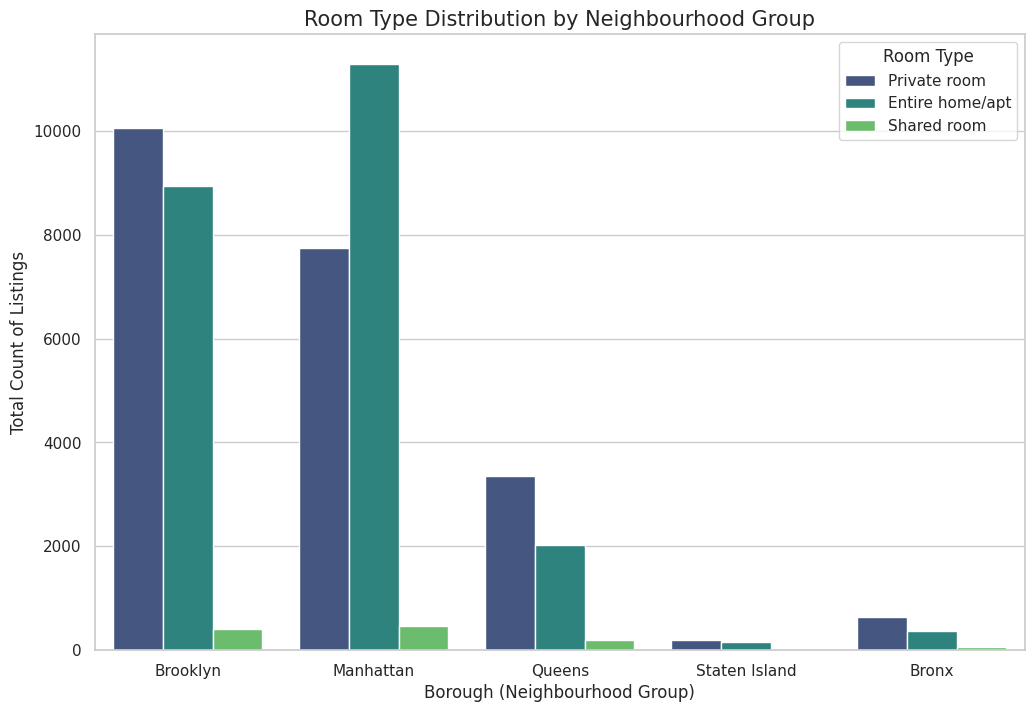

In [56]:
# 1. Set the visual style
sns.set_theme(style="whitegrid")

# 2. Create the figure
plt.figure(figsize=(12, 8))

# 3. Create a count plot grouped by room type
sns.countplot(data=df_filtered, x='neighbourhood_group', hue='room_type', palette='viridis')

# 4. Add titles and labels
plt.title('Room Type Distribution by Neighbourhood Group', fontsize=15)
plt.xlabel('Borough (Neighbourhood Group)', fontsize=12)
plt.ylabel('Total Count of Listings', fontsize=12)
plt.legend(title='Room Type')

# 5. Display the plot
plt.show()

/tmp/ipython-input-700125329.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=rev_stats, x='neighbourhood', y='avg_rev', palette='YlOrBr_r', ax=ax1, alpha=0.8)


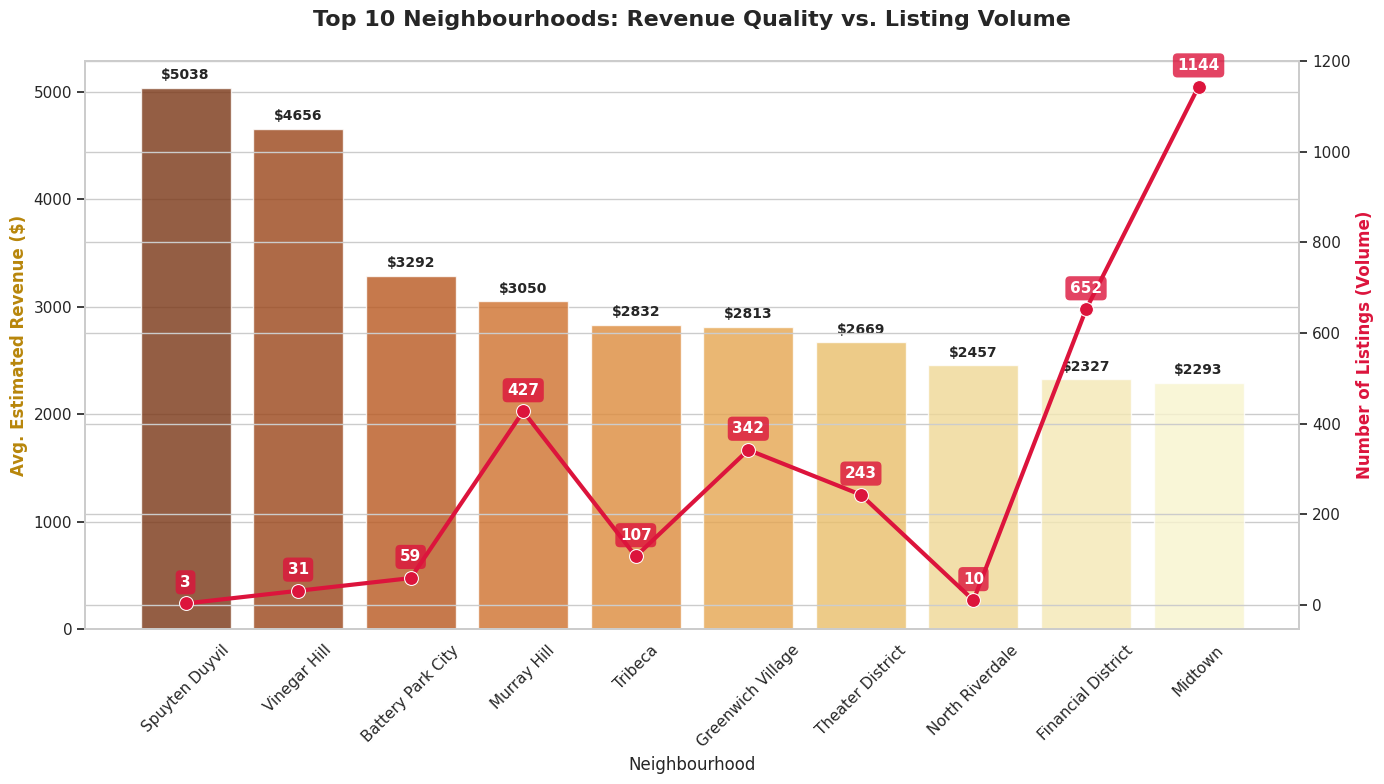

In [71]:
# 1. Aggregate Average Revenue and Listing Count
rev_stats = df_filtered.groupby('neighbourhood').agg(
    avg_rev=('estimated_revenue', 'mean'),
    listing_count=('id', 'count')
).sort_values(by='avg_rev', ascending=False).head(10).reset_index()

# 2. Create the figure and primary axis (for Bars)
fig, ax1 = plt.subplots(figsize=(14, 8))

# 3. Plot the Revenue as Bars (Primary Y-axis)
bar_plot = sns.barplot(data=rev_stats, x='neighbourhood', y='avg_rev', palette='YlOrBr_r', ax=ax1, alpha=0.8)
ax1.set_ylabel('Avg. Estimated Revenue ($)', fontsize=12, color='darkgoldenrod', fontweight='bold')
ax1.set_xlabel('Neighbourhood', fontsize=12)
ax1.set_title('Top 10 Neighbourhoods: Revenue Quality vs. Listing Volume', fontsize=16, fontweight='bold', pad=25)
plt.xticks(rotation=45)

# Add Data Labels for the Bars
for p in bar_plot.patches:
    ax1.annotate(f'${p.get_height():.0f}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 9),
                   textcoords='offset points', fontsize=10, fontweight='bold')

# 4. Create secondary axis (for Line)
ax2 = ax1.twinx()

# 5. Plot the Listing Count as a Line (Secondary Y-axis)
sns.lineplot(data=rev_stats, x='neighbourhood', y='listing_count', marker='o', color='crimson', linewidth=3, ax=ax2, markersize=10)
ax2.set_ylabel('Number of Listings (Volume)', fontsize=12, color='crimson', fontweight='bold')

# Add Data Labels for the Line points
for i, txt in enumerate(rev_stats['listing_count']):
    ax2.annotate(f'{txt}',
                 (rev_stats['neighbourhood'].iloc[i], rev_stats['listing_count'].iloc[i]),
                 textcoords="offset points", xytext=(0, 12),
                 ha='center', fontsize=11, color='white', fontweight='bold',
                 bbox=dict(boxstyle='round,pad=0.3', fc='crimson', ec='none', alpha=0.8))

# 6. Final layout adjustments
plt.tight_layout()
plt.show()

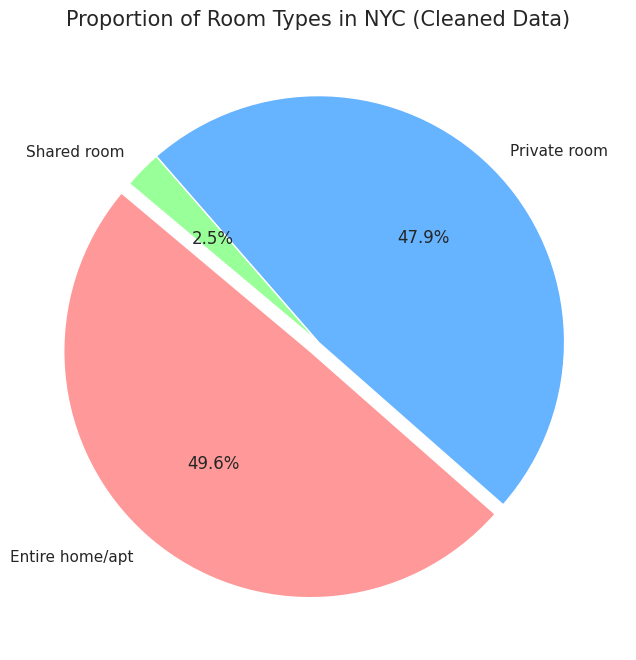

In [59]:
# 1. Count the occurrences of each room type in the FILTERED data
room_counts = df_filtered['room_type'].value_counts()

# 2. Create the Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(room_counts,
        labels=room_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=['#ff9999','#66b3ff','#99ff99'],
        explode=(0.05, 0, 0))

# 3. Add Title
plt.title('Proportion of Room Types in NYC (Cleaned Data)', fontsize=15)

# 4. Show the plot
plt.show()

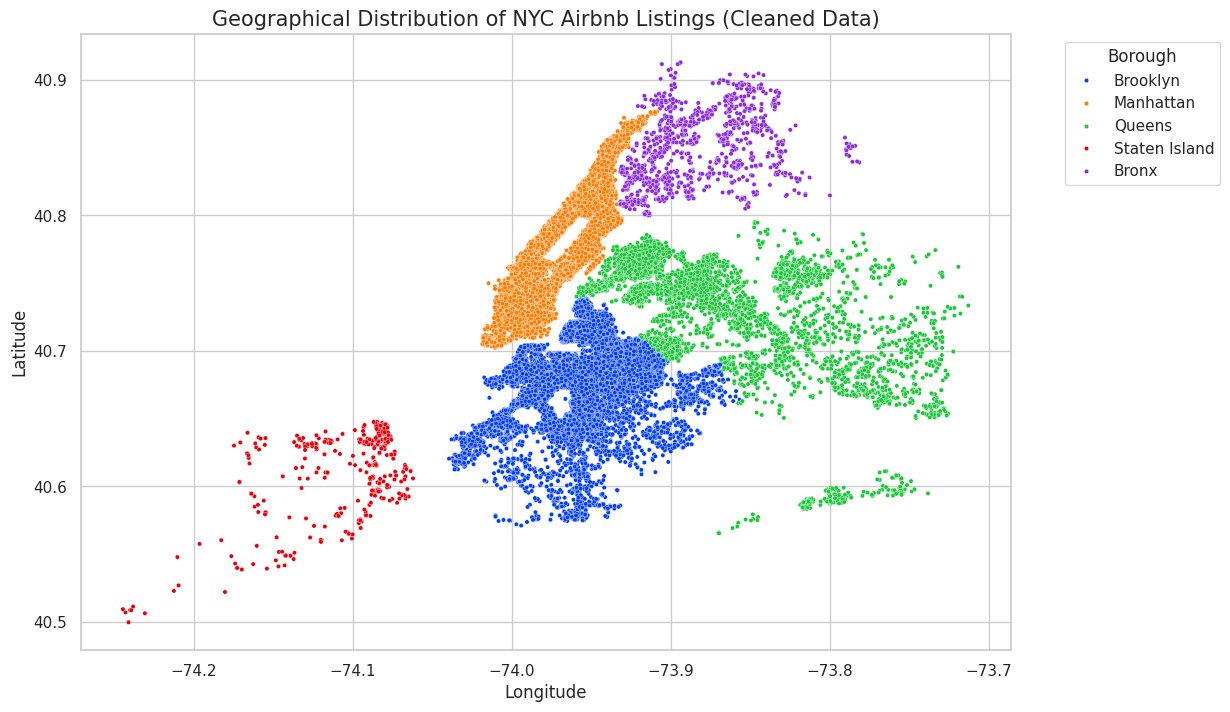

In [60]:
# 1. Set the figure size
plt.figure(figsize=(12, 8))

# 2. Create a scatter plot using the FILTERED data
sns.scatterplot(data=df_filtered, x='longitude', y='latitude', hue='neighbourhood_group', palette='bright', s=10)

# 3. Add titles and labels
plt.title('Geographical Distribution of NYC Airbnb Listings (Cleaned Data)', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left') # Moved legend outside for clarity

# 4. Show the plot
plt.show()

/tmp/ipython-input-3012299985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['availability_bins'] = (df_filtered['availability_365'] // 10) * 10


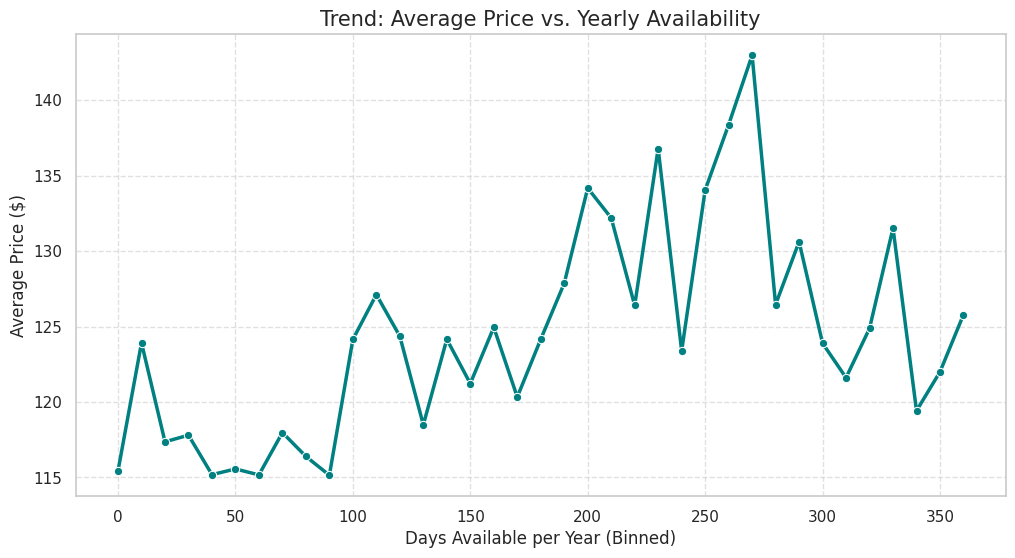

In [61]:
# Create availability bins (e.g., every 10 days) to smooth the line
df_filtered['availability_bins'] = (df_filtered['availability_365'] // 10) * 10

# 2. Calculate the average price for each availability bin
trend_data = df_filtered.groupby('availability_bins')['price'].mean().reset_index()

# 3. Create the Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, x='availability_bins', y='price', marker='o', color='teal', linewidth=2.5)

# 4. Add Titles and Labels
plt.title('Trend: Average Price vs. Yearly Availability', fontsize=15)
plt.xlabel('Days Available per Year (Binned)', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6) # Add a light grid for better readability

# 5. Show the plot
plt.show()

# **Executive Summary**
## **NYC Airbnb Market Analysis (2019)**

---

## **Objective**
This project analyzes the New York City Airbnb market to identify pricing patterns, location-based strategies, revenue drivers, host behavior trends, and regulatory impacts. The aim is to translate data insights into actionable recommendations for hosts, investors, and hospitality-focused businesses.

---

## **1. Market Reality vs. Outliers**
Although New York City is often perceived as a luxury destination, the majority of Airbnb listings operate within a mid-range price segment.

Approximately 95% of listings are priced below 334 ,After removing extreme outliers 1,000+ listings , the true average nightly price is around $150.

The NYC Airbnb market is largely mass-market driven rather than luxury-dominated.  
Investors should focus on the $100–$250 price range for stable demand and consistent occupancy.

---

## **2. Location Strategy: Volume vs. Value**
Pricing power and listing volume vary significantly across boroughs.

Manhattan leads in both average price and total listings, confirming its premium demand.  
Brooklyn has the highest density of listings, making it a volume-driven market.  
The Bronx and Staten Island show lower prices and lower competition.

Manhattan is ideal for premium positioning.  
Brooklyn suits high-occupancy, volume-based strategies.  
The Bronx and Staten Island represent growth opportunities for budget-focused offerings.

---

## **3. Revenue Sweet Spots**
High revenue is not always linked to famous or highly saturated neighborhoods.

Top revenue neighborhoods often have low listing volume.  
Revenue is driven by uniqueness, exclusivity, and minimum stay requirements rather than just high nightly prices.

Identifying underserved neighborhoods with high revenue potential and limited competition offers the strongest opportunity for new hosts.

---

## **4. The Rise of the Professional Host**
Pricing increases with listing availability.

Hosts available more than 200 days per year consistently charge higher prices.  
Casual hosts available fewer than 50 days tend to underprice their listings.

The NYC Airbnb market has shifted from casual peer-to-peer sharing to a professionalized hosting industry.  
Operating as a full-time host aligns with higher pricing power and improved revenue performance.

---

## **5. Regulatory Adaptation**
Room type strongly influences minimum stay requirements.

Entire home or apartment listings require longer minimum stays.  
Private rooms remain more flexible for short-term stays ranging from one to three nights.

This reflects host adaptation to NYC short-term rental regulations, particularly restrictions on entire-unit rentals.  
For legal flexibility and short-stay demand, private rooms are the most resilient investment option.

---

## **Final Strategic Recommendations**
To maximize success in the NYC Airbnb market:

Price listings between 100 and $175 to capture the highest demand segment.  
Focus on Brooklyn for volume-driven strategies or Manhattan for premium positioning.  
Maintain more than 200 days of availability to align with professional host performance.  
Closely monitor minimum night requirements to ensure regulatory compliance.

---

